In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_parquet("data_step.parquet")
df

M1RigidBodyMotions  \
0     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1     [1.1356986482638899e-14, -1.950929372436917e-1...   
2     [-1.9887265400255904e-09, -7.3397086927448035e...   
3     [-1.967968749241457e-09, -7.387724420657011e-0...   
4     [-1.865137160659721e-09, -7.500208340381663e-0...   
...                                                 ...   
2996  [4.014650226450168e-10, 1.0812014014068334e-08...   
2997  [4.2244838818233387e-10, 1.0732053401912702e-0...   
2998  [4.4200884452001473e-10, 1.065225790658024e-08...   
2999  [4.596555551366524e-10, 1.0573026005398061e-08...   
3000  [4.7498150128795e-10, 1.0494762237511366e-08, ...   

                                     M2RigidBodyMotions  
0     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1     [-1.2993374916112482e-12, 3.7508918014084117e-...  
2     [-4.4229673907393876e-08, 2.916354097204113e-0...  
3     [-4.4186651337210376e-08, 2.9183549714150475e-...  
4     [-4.395688894254076e-08, 2.9170556179133205e-0...  
...                                                 ...  
2996  [1.1840047591699326e-08, -1.1372866767376893e-...  
2997  [1.183283032418492e-08, -1.1376596112153952e-0...  
2998  [1.1807484100850694e-08, -1.138427637912705e-0...  
2999  [1.1761081593089013e-08, -1.1394275255786752e-...  
3000  [1.1691253653178396e-08, -1.1404834958039191e-...  

[3001 rows x 2 columns]

In [3]:
t = np.arange(len(df))/1000
m1_rbm = np.vstack(df["M1RigidBodyMotions"]).reshape(-1,7,6)
m2_rbm = np.vstack(df["M2RigidBodyMotions"]).reshape(-1,7,6)

Text(0.5, 1.0, 'M1 S1 Rx')

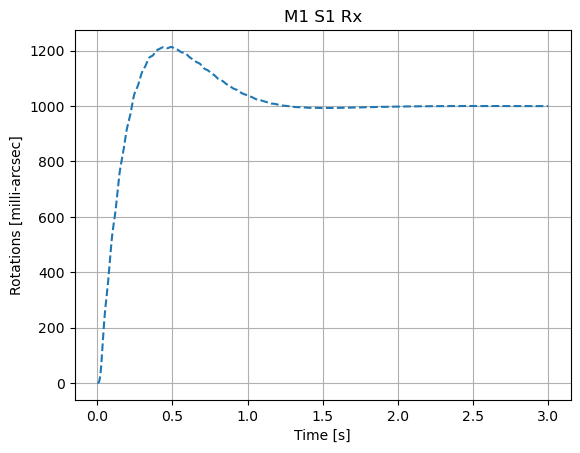

In [4]:
i = 1
fig,ax = plt.subplots()
ax.plot(t,m1_rbm[:,i-1,3]*180*3600e3/np.pi,'--')
ax.grid()
ax.set_xlabel("Time [s]")
ax.set_ylabel("Rotations [milli-arcsec]")
ax.set_title(f"M1 S{i} Rx")


In [7]:
!pwd

/home/ubuntu/projects/dos-actors/clients/m1-ctrl/tests/mount-m1_step


In [6]:
np.savez("m1-s1-rx.npz",time=t, rx_mas= m1_rbm[:,i-1,3]*180*3600e3/np.pi )

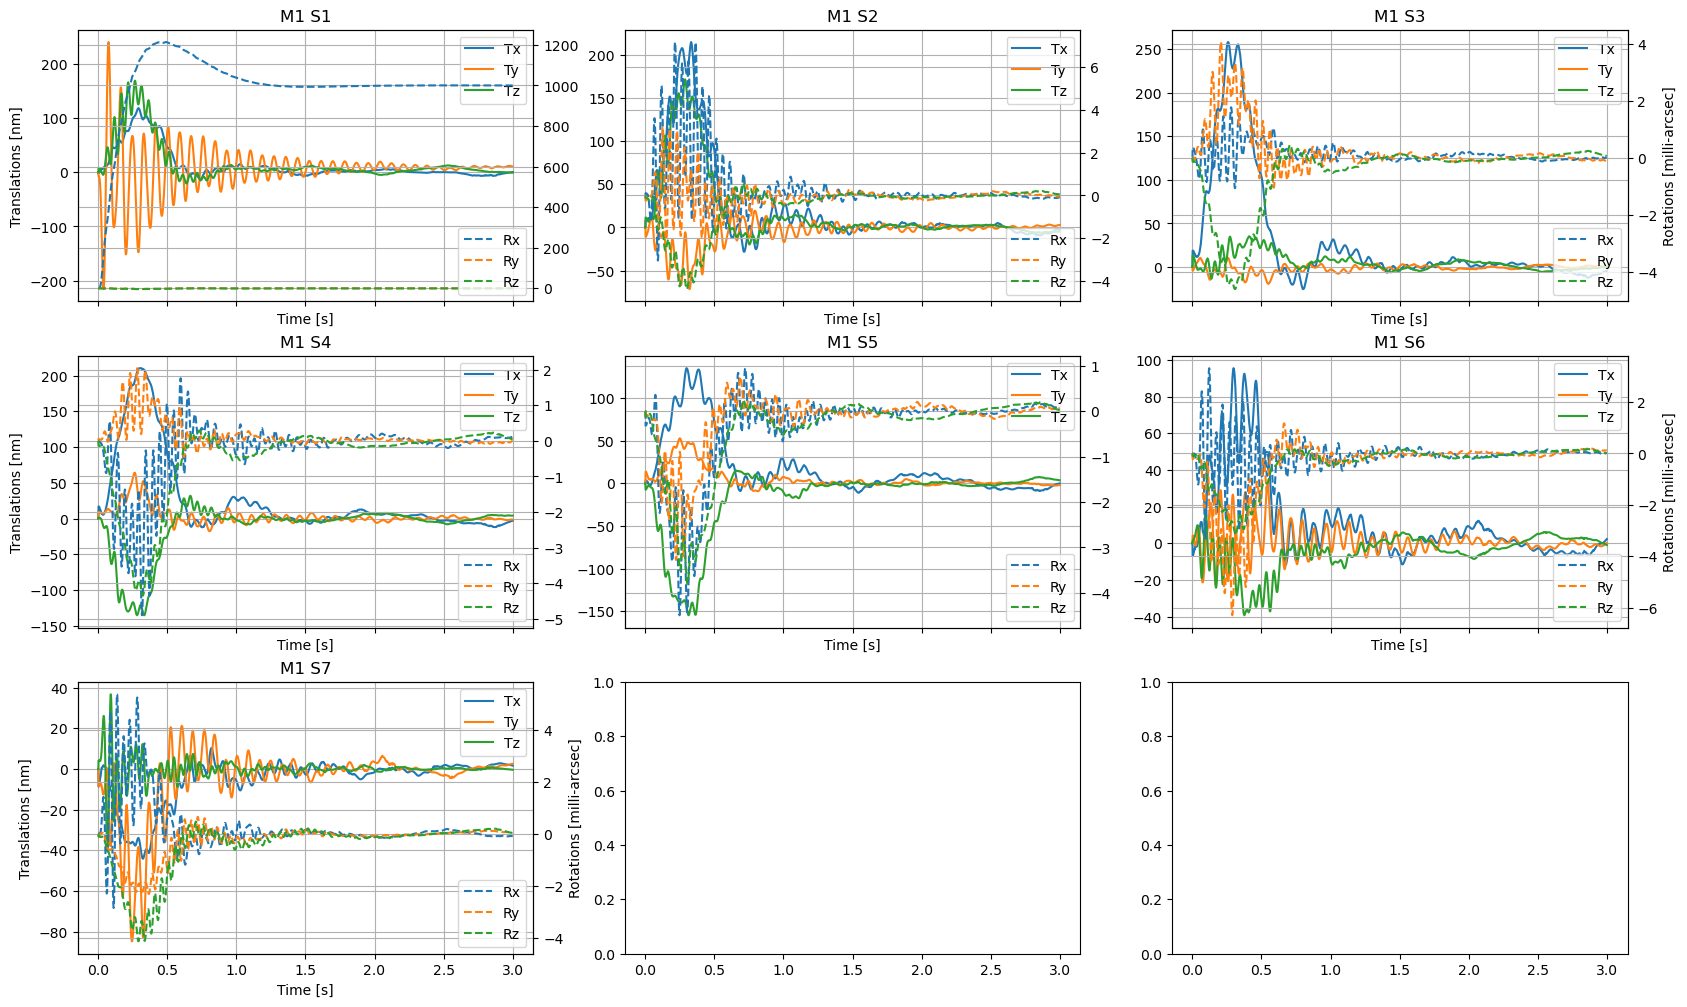

In [4]:
fig, axs = plt.subplots(ncols=3,nrows=3, sharex=True,  figsize = (20,12))
axs = axs.ravel()
for i in range(1,8):
    ax = axs[i-1]
    ax.plot(t,m1_rbm[:,i-1,:3]*1e9)
    ax.legend(["Tx","Ty","Tz"],loc=1)
    ax.grid()
    ax.set_xlabel("Time [s]")
    if i==1 or i==4 or i==7:
        ax.set_ylabel("Translations [nm]")
    ax.set_title(f"M1 S{i}")
    axo = ax.twinx() 
    axo.plot(t,m1_rbm[:,i-1,3:]*180*3600e3/np.pi,'--')
    axo.legend(["Rx","Ry","Rz"],loc=4)
    axo.grid()
    if i==3 or i==6 or i==7:
        axo.set_ylabel("Rotations [milli-arcsec]")


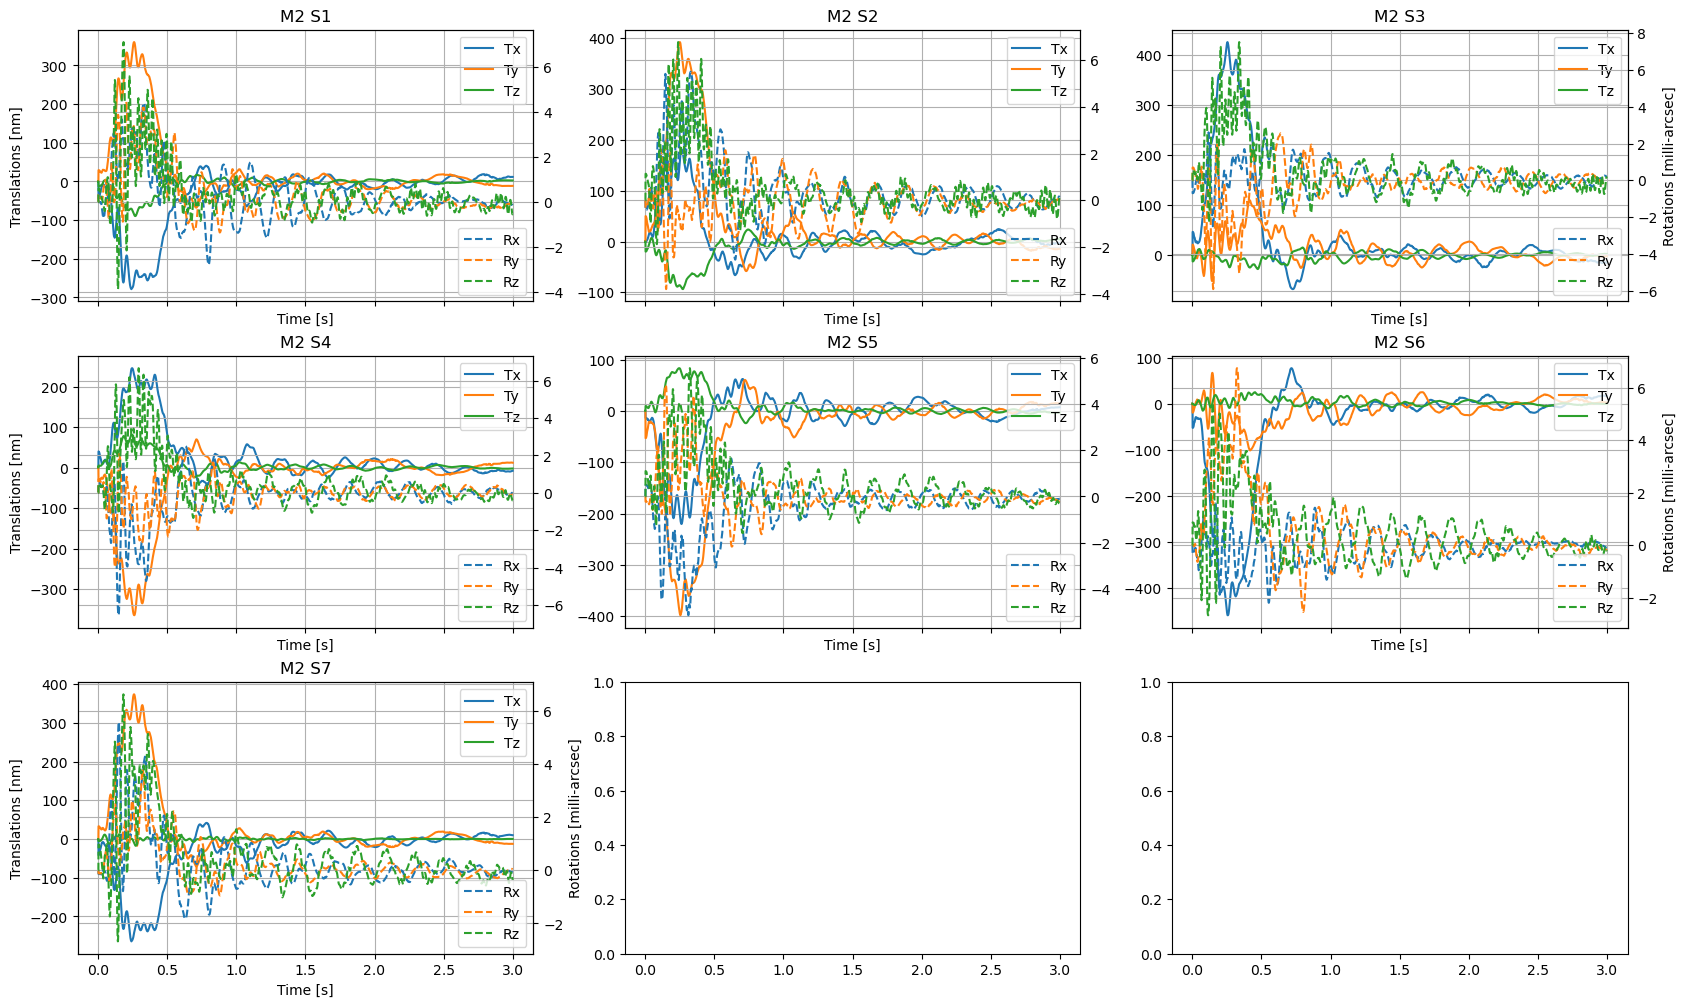

In [5]:
fig, axs = plt.subplots(ncols=3,nrows=3, sharex=True,  figsize = (20,12))
axs = axs.ravel()
for i in range(1,8):
    ax = axs[i-1]
    ax.plot(t,m2_rbm[:,i-1,:3]*1e9)
    ax.legend(["Tx","Ty","Tz"],loc=1)
    ax.grid()
    ax.set_xlabel("Time [s]")
    if i==1 or i==4 or i==7:
        ax.set_ylabel("Translations [nm]")
    ax.set_title(f"M2 S{i}")
    axo = ax.twinx() 
    axo.plot(t,m2_rbm[:,i-1,3:]*180*3600e3/np.pi,'--')
    axo.legend(["Rx","Ry","Rz"],loc=4)
    axo.grid()
    if i==3 or i==6 or i==7:
        axo.set_ylabel("Rotations [milli-arcsec]")
